In [1]:
import ma_codes as codes
from ma_codes import mysize, mymap, gray_red

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import re

## Some Plotting Parameters
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42
sb.set_style("ticks")

#pd.set_option("display.max_columns", 100)
sc.logging.print_version_and_date()

Running Scanpy 1.10.2, on 2024-09-17 09:27.


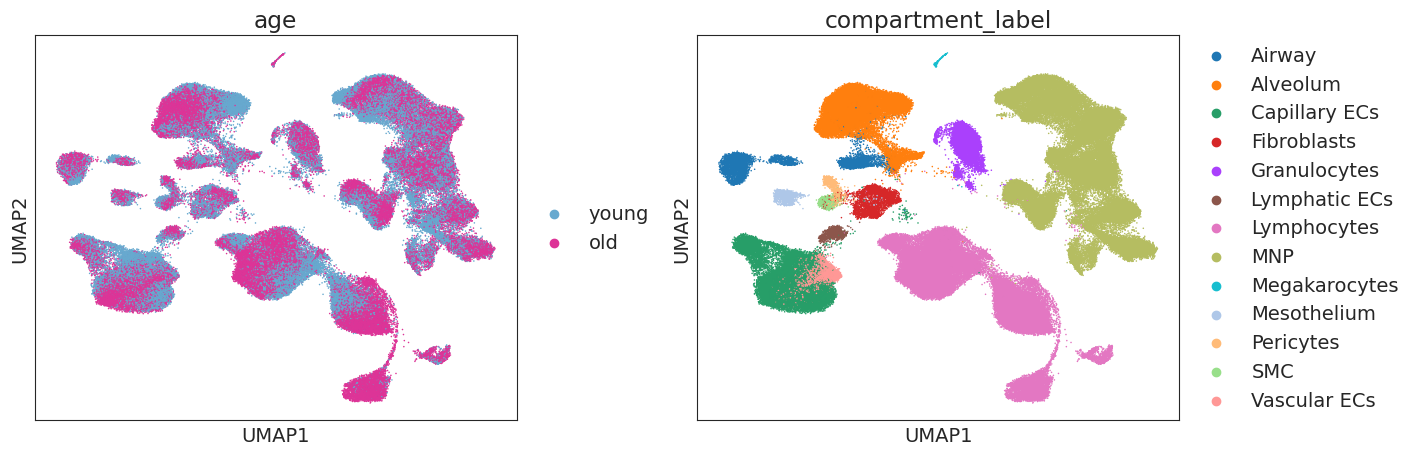

In [2]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "240904_Bleo_Ageing_annotated_final.h5ad", cache = False)
sc.pl.umap(adata, color = ["age", "compartment_label"], size = 5, wspace = 0.25)

### Young Mice Results

In [3]:
from os import listdir
tab_folder = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_targeted_young/"

#files = np.setdiff1d(listdir(tab_folder), ["diffxpy_Donor_vs_COPD_AT1_constrained.txt"])
files = [f for f in listdir(tab_folder) if (".txt" in f)]
files[:20]

['diffxpy_control_vs_bleo_Krt8-ADI_d10_young.txt',
 'diffxpy_control_vs_bleo_AT1_d3_young.txt',
 'diffxpy_control_vs_bleo_Myofibroblasts_d3_young.txt',
 'diffxpy_control_vs_bleo_AT1_d10_young.txt',
 'diffxpy_control_vs_bleo_Krt8-ADI_d30_young.txt',
 'diffxpy_control_vs_bleo_AT2_activated_d3_young.txt',
 'diffxpy_control_vs_bleo_Myofibroblasts_d20_young.txt',
 'diffxpy_control_vs_bleo_AT2_d3_young.txt',
 'diffxpy_control_vs_bleo_AT2_d30_young.txt',
 'diffxpy_control_vs_bleo_AT1_d37_young.txt',
 'diffxpy_control_vs_bleo_AT2_d20_young.txt',
 'diffxpy_control_vs_bleo_AT2_activated_d30_young.txt',
 'diffxpy_control_vs_bleo_Myofibroblasts_d30_young.txt',
 'diffxpy_control_vs_bleo_AT2_d37_young.txt',
 'diffxpy_control_vs_bleo_AT1_d20_young.txt',
 'diffxpy_control_vs_bleo_Krt8-ADI_d3_young.txt',
 'diffxpy_control_vs_bleo_AT1_d30_young.txt',
 'diffxpy_all_control_vs_bleo_timepoints_targeted_young.txt',
 'diffxpy_control_vs_bleo_Myofibroblasts_d10_young.txt',
 'diffxpy_control_vs_bleo_AT2_activa

#### Order the files (to have nicer columns later on)

In [4]:
bleo_order = ["Myofibroblasts", 'AT1', 'AT2 activated', 'Krt8-ADI', "AT2"]
age = "young"

order = []
for ct in bleo_order:
    for d in ["d3", "d10", "d20", "d30", "d37"]:
        current = "diffxpy_control_vs_bleo_%s_%s_%s.txt" %(ct.replace(" ", "_"), d, age) 
        if current in files:
            order.append(current)

## :)
print(len(files))
print(len(order))

27
25


In [5]:
", ".join(order[:20])

'diffxpy_control_vs_bleo_Myofibroblasts_d3_young.txt, diffxpy_control_vs_bleo_Myofibroblasts_d10_young.txt, diffxpy_control_vs_bleo_Myofibroblasts_d20_young.txt, diffxpy_control_vs_bleo_Myofibroblasts_d30_young.txt, diffxpy_control_vs_bleo_Myofibroblasts_d37_young.txt, diffxpy_control_vs_bleo_AT1_d3_young.txt, diffxpy_control_vs_bleo_AT1_d10_young.txt, diffxpy_control_vs_bleo_AT1_d20_young.txt, diffxpy_control_vs_bleo_AT1_d30_young.txt, diffxpy_control_vs_bleo_AT1_d37_young.txt, diffxpy_control_vs_bleo_AT2_activated_d3_young.txt, diffxpy_control_vs_bleo_AT2_activated_d10_young.txt, diffxpy_control_vs_bleo_AT2_activated_d20_young.txt, diffxpy_control_vs_bleo_AT2_activated_d30_young.txt, diffxpy_control_vs_bleo_AT2_activated_d37_young.txt, diffxpy_control_vs_bleo_Krt8-ADI_d3_young.txt, diffxpy_control_vs_bleo_Krt8-ADI_d10_young.txt, diffxpy_control_vs_bleo_Krt8-ADI_d20_young.txt, diffxpy_control_vs_bleo_Krt8-ADI_d30_young.txt, diffxpy_control_vs_bleo_Krt8-ADI_d37_young.txt'

#### Snippet to add average expression per day and treatment
As in /Bleo_Mesenchyme/concatenate_spline_tables.ipynb

AT1 - d30


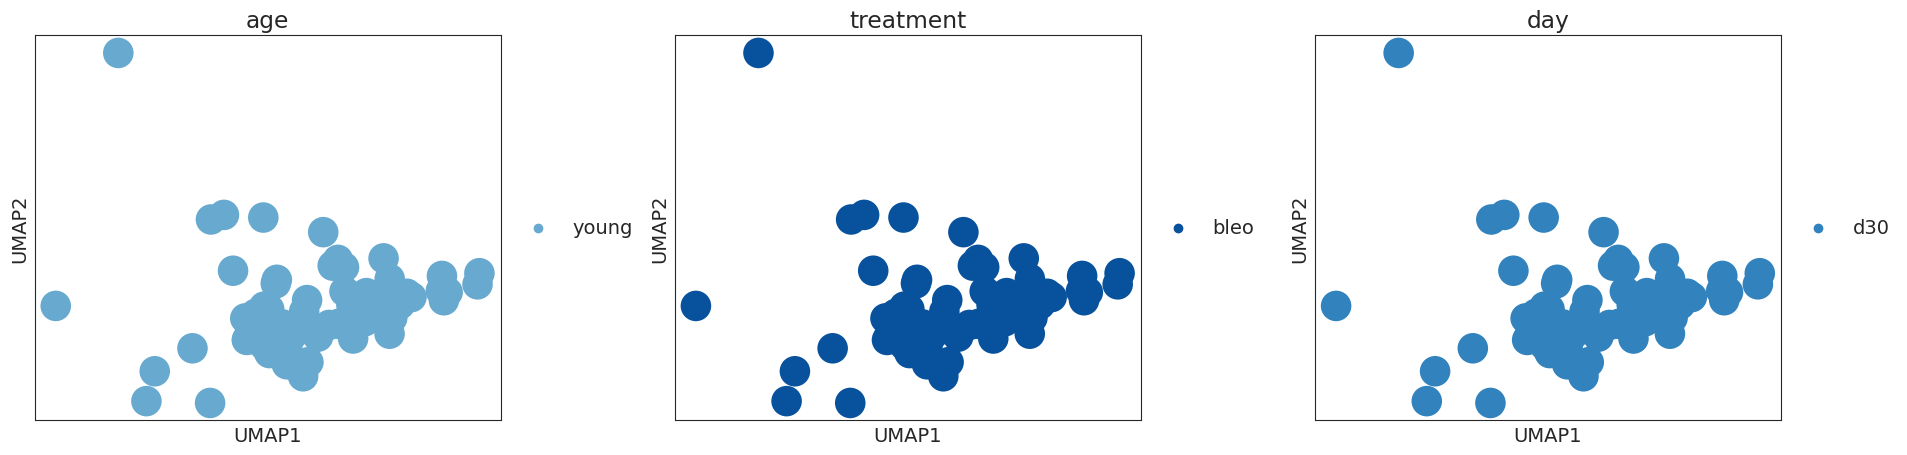

In [6]:
file = "diffxpy_control_vs_bleo_AT1_d30_young.txt"
row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "young"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
        (adata.obs.age == age) & (adata.obs.day == time)
sc.pl.umap(adata[cells], color = ["age", "treatment", "day"], wspace = 0.25)

In [7]:
## Mean expression of these very cells
xlabel = "day"
tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)

genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
means.shape

(5006, 1)

In [8]:
means.head(2)

day,d30
gene,
0610012G03Rik,0.000000
Pitpnm2,0.029746


#### Adapted mean expression for special cell types (Myofibroblasts, activated AT2, Krt8 ADI)

In [9]:
file = "diffxpy_control_vs_bleo_Myofibroblasts_d3_young.txt"
sum([f in file for f in ["Myofibroblasts", "Krt8-ADI"]]) 

1

In [10]:
file = "diffxpy_control_vs_bleo_AT1_d3_young.txt"
sum([f in file for f in ["Myofibroblasts", "Krt8-ADI"]]) 

0

Krt8-ADI - d3


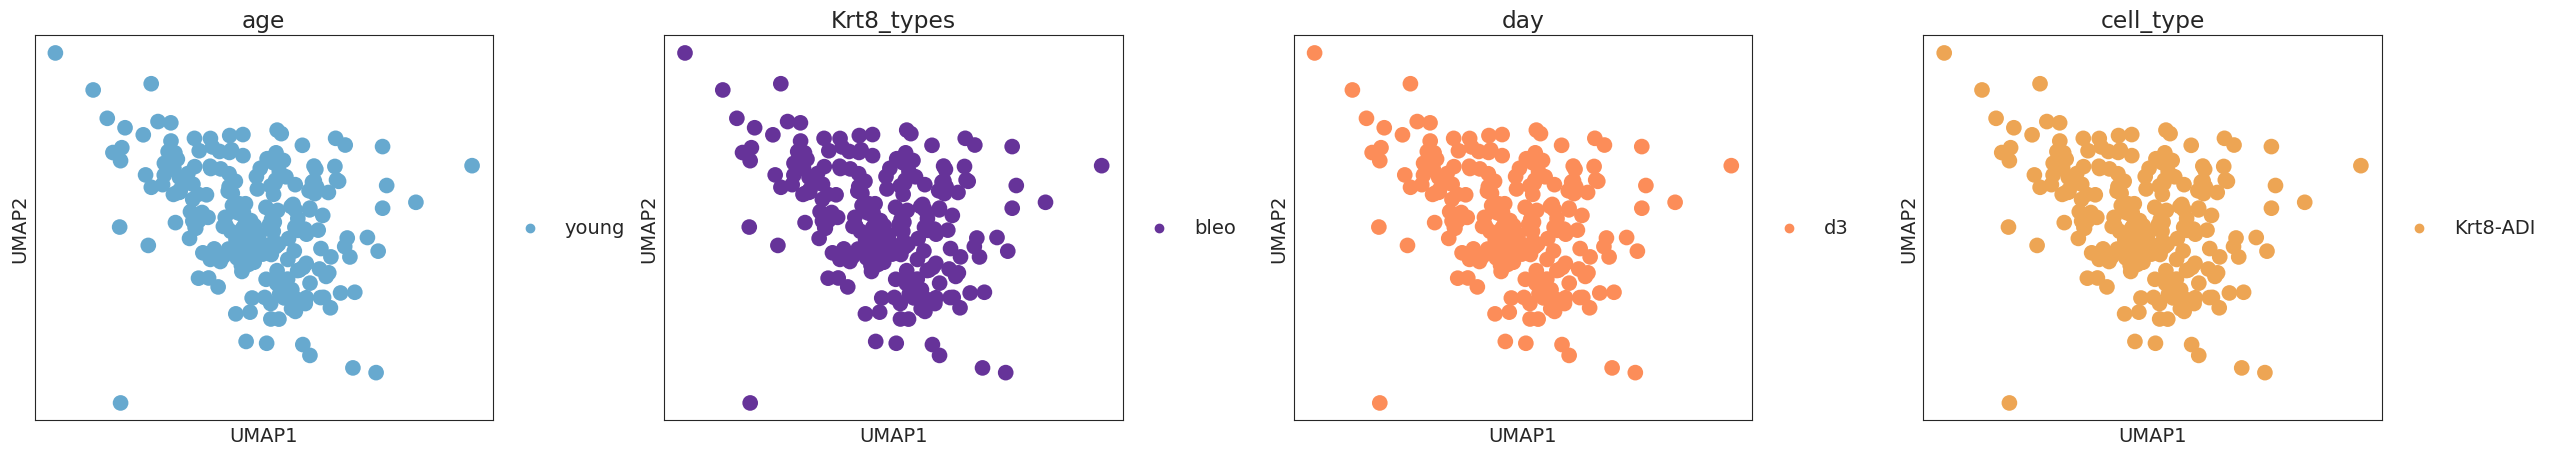

In [11]:
file = "diffxpy_control_vs_bleo_Krt8-ADI_d3_young.txt"
row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "young"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

ct_map = {"Myofibroblasts": "Myofib_types", "Krt8-ADI": "Krt8_types", "AT2 activated": "AT2activ_types"}

## In case is is a specially calculated cell type
if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2 activated"]]) > 0):
    condition = ct_map[ct]
    cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
            (adata.obs.age == age) & (adata.obs.day == time)
else:
    cells = (adata.obs.myofib_sender == ct) & (adata.obs.treatment == treat) &\
            (adata.obs.age == age) & (adata.obs.day == time)

sc.pl.umap(adata[cells], color = ["age", condition, "day", "cell_type"], wspace = 0.25)

In [12]:
## Mean expression of these very cells
xlabel = "day"
tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)

genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
means.shape

(5475, 1)

In [13]:
means.head(2)

day,d3
gene,
Hspb8,0.218131
Cox7a2,0.274731


Krt8-ADI - d3


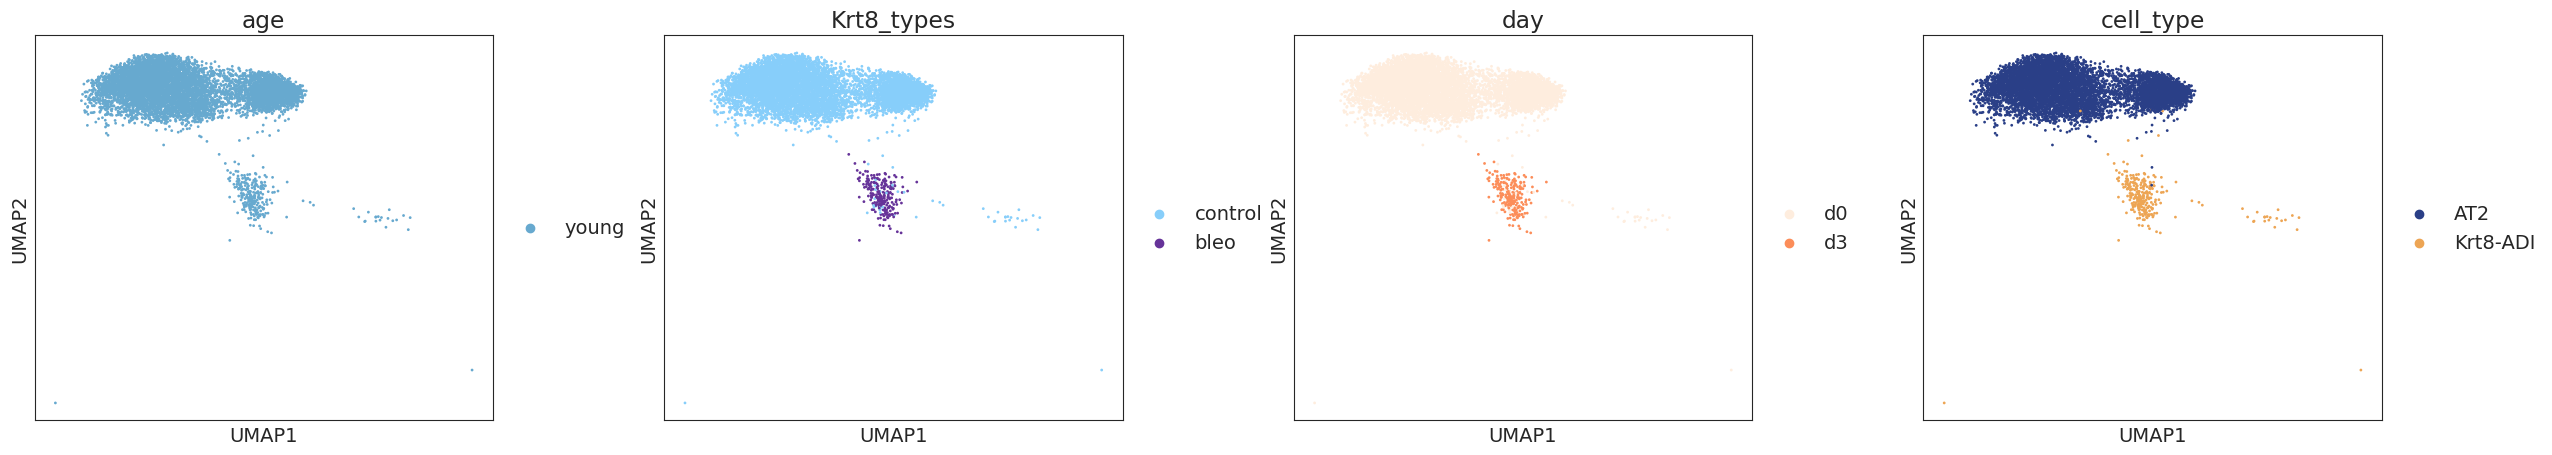

In [14]:
ct_map = {"Myofibroblasts": "Myofib_types", "Krt8-ADI": "Krt8_types", "AT2 activated": "AT2activ_types"}
file = "diffxpy_control_vs_bleo_Krt8-ADI_d3_young.txt"

row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "young"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

## In case is is a specially calculated cell type
if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2_activated"]]) > 0):
    condition = ct_map[ct]
    ## Add corresponding controls
    if(time == "d3"):
        cells = (adata.obs.day.isin(["d0", time])) & (adata.obs.age == age) & \
                (adata.obs.loc[:, condition].isin(["control", "bleo"]))
    else:
        cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.time_point == time)

else:
    if(time == "d3"):
        cells = (adata.obs.cell_type == ct) & (adata.obs.age == age) & (adata.obs.day.isin(["d0", time]))
    else:
        cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.day == time)

sc.pl.umap(adata[cells], color = ["age", condition, "day", "cell_type"], wspace = 0.25)

In [15]:
## Mean expression of these very cells
xlabel = "day"
tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)

genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
means.shape

(5475, 2)

In [16]:
means.head(2)

day,d0,d3
gene,,
Hspb8,0.031755,0.218131
Cox7a2,0.101001,0.274731


AT1 - d3


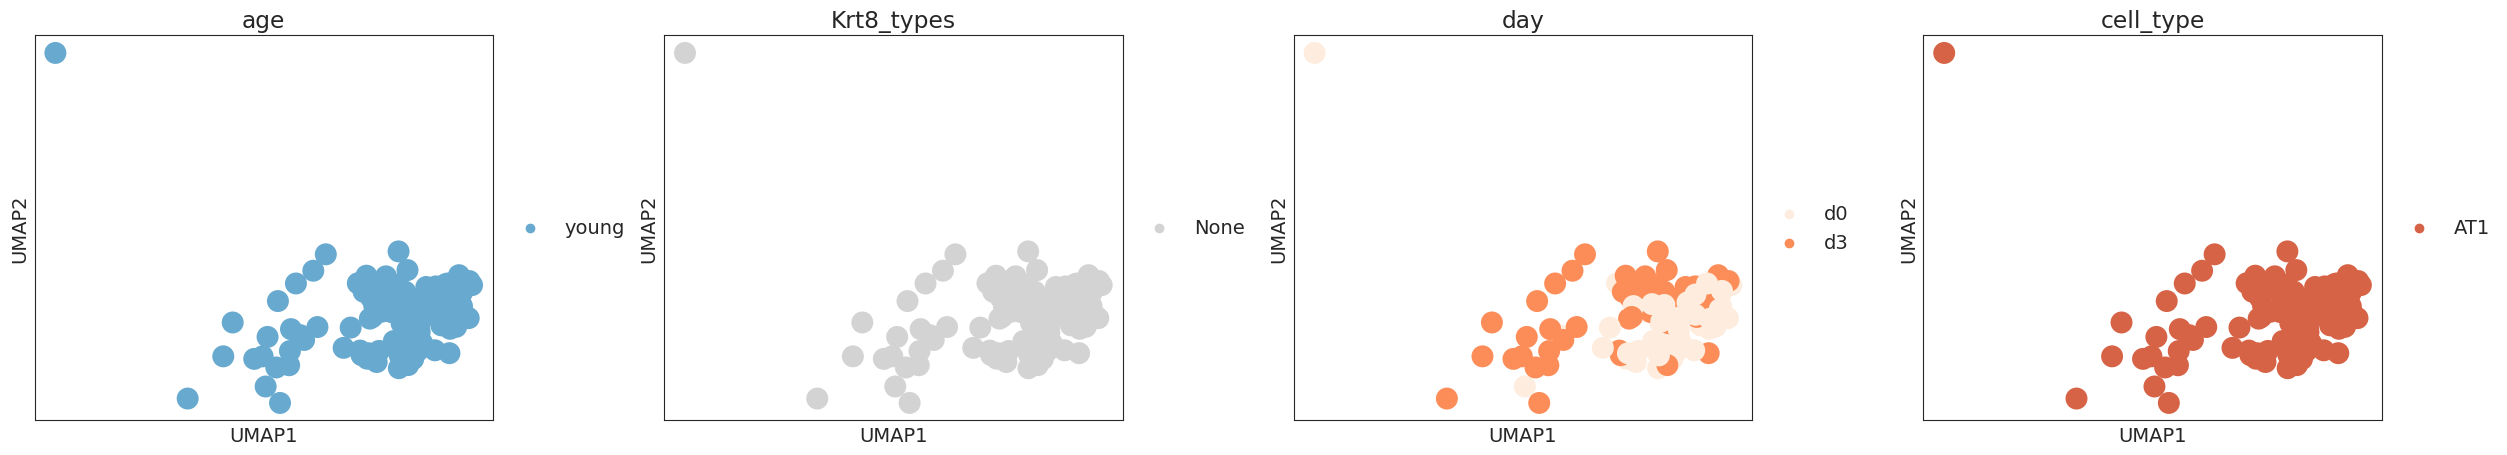

In [17]:
## Double check with normal cell type
file = "diffxpy_control_vs_bleo_AT1_d3_young.txt"

row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
ct = re.sub("_d[\d]+", "", row).replace("_", " ")  ## adjusted
treat = "bleo"
age = "young"
time = re.findall("_d[\d]+_", file)[0].replace("_", "")
print("%s - %s" %(ct, time))

## In case is is a specially calculated cell type
if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2_activated"]]) > 0):
    condition = ct_map[ct]
    ## Add corresponding controls
    if(time == "d3"):
        cells = (adata.obs.day.isin(["d0", time])) & (adata.obs.age == age) & \
                (adata.obs.loc[:, condition].isin(["control", "bleo"]))
    else:
        cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.day == time)

else:
    if(time == "d3"):
        cells = (adata.obs.cell_type == ct) & (adata.obs.age == age) & (adata.obs.day.isin(["d0", time]))
    else:
        cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
                (adata.obs.age == age) & (adata.obs.day == time)

sc.pl.umap(adata[cells], color = ["age", condition, "day", "cell_type"], wspace = 0.25)

### Tidy - Concatenate DGE Tables for all cell types

In [18]:
## Concatenate all Tables
ct_map = {"Myofibroblasts": "Myofib_types", "Krt8-ADI": "Krt8_types", "AT-2 activated": "AT2activ_types"}

#files = [f for f in listdir(tab_folder) if (".txt" in f)]
files = order    ## set above for nicer column ordering

treat = "bleo"
age = "young"
xlabel = "day"

all_tabs = pd.DataFrame()
cols = ["pval", "log2fc", "pct.control", "pct.%s" %treat, "cell_type"]

for file in files:
    tab = pd.read_csv(tab_folder + file, sep = "\t", index_col = 0)
    
    row = re.split("_vs_bleo_", re.split("\.", file)[0])[1].replace("_%s" %age, "")
    ct = re.sub("_d[\d]+", "", row).replace("_", " ")
    time = re.findall("_d[\d]+_", file)[0].replace("_", "")
    tab["cell_type"] = row
    tab = tab.loc[:, cols].copy()    

    ## In case is is a specially calculated cell type
    if(sum([f in file for f in ["Myofibroblasts", "Krt8-ADI", "AT2 activated"]]) > 0):
        condition = ct_map[ct]
        
        ## Add corresponding d0 control mean expression if timepoint is d3
        if(time == "d3"):
            cells = (adata.obs.day.isin(["d0", time])) & (adata.obs.age == age) & \
                    (adata.obs.loc[:, condition].isin(["control", "bleo"]))
        else:
            cells = (adata.obs.loc[:, condition] == treat) & (adata.obs.treatment == treat) &\
                    (adata.obs.age == age) & (adata.obs.day == time)
    else:
        if(time == "d3"):
            cells = (adata.obs.cell_type == ct) & (adata.obs.age == age) & \
                    (adata.obs.day.isin(["d0", time]))
        else:
            cells = (adata.obs.cell_type == ct) & (adata.obs.treatment == treat) &\
                    (adata.obs.age == age) & (adata.obs.day == time)
    
    genExp = pd.DataFrame(adata[cells, tab.index].X.todense(), index = adata[cells].obs_names, columns = tab.index)
    genExp[xlabel] = adata[cells].obs.loc[:, xlabel]
    means = pd.DataFrame(genExp.groupby([xlabel]).mean().transpose())
    
    ## cell type and time point will be added anyways
    means.columns = ["avgExpr_%s" %col if col == "d0" else "avgExpr" for col in means.columns]    
    
    tab = pd.concat([tab, means.loc[tab.index]], axis = 1)

    all_tabs = pd.concat([all_tabs, tab], axis = 0)
    print("Concatenated %s\t%s x %s" %(row, all_tabs.shape[0], all_tabs.shape[1]))
    
all_tabs.head(4)

Concatenated Myofibroblasts_d3	5894 x 7
Concatenated Myofibroblasts_d10	11551 x 7
Concatenated Myofibroblasts_d20	17270 x 7
Concatenated Myofibroblasts_d30	23801 x 7
Concatenated Myofibroblasts_d37	28986 x 7
Concatenated AT1_d3	34414 x 7
Concatenated AT1_d10	39309 x 7
Concatenated AT1_d20	44228 x 7
Concatenated AT1_d30	49234 x 7
Concatenated AT1_d37	53562 x 7
Concatenated AT2_activated_d3	58716 x 7
Concatenated AT2_activated_d10	62896 x 7
Concatenated AT2_activated_d20	67501 x 7
Concatenated AT2_activated_d30	72669 x 7
Concatenated AT2_activated_d37	77536 x 7
Concatenated Krt8-ADI_d3	83011 x 7
Concatenated Krt8-ADI_d10	88176 x 7
Concatenated Krt8-ADI_d20	93365 x 7
Concatenated Krt8-ADI_d30	98953 x 7
Concatenated Krt8-ADI_d37	102448 x 7
Concatenated AT2_d3	105686 x 7
Concatenated AT2_d10	108259 x 7
Concatenated AT2_d20	111167 x 7
Concatenated AT2_d30	115041 x 7
Concatenated AT2_d37	117684 x 7


,pval,log2fc,pct.control,pct.bleo,cell_type,avgExpr_d0,avgExpr
gene,,,,,,,
Zbp1,0.0,283.913085,0.000000,0.162791,Myofibroblasts_d3,0.000000,0.071127
Ch25h,0.0,283.913085,0.000000,0.186047,Myofibroblasts_d3,0.000000,0.158696
Fndc1,0.0,-297.776029,0.067568,0.000000,Myofibroblasts_d3,0.047237,0.000000
Timp3,0.0,-2.185903,0.876126,0.488372,Myofibroblasts_d3,1.687373,0.565261


In [19]:
from statsmodels.stats.multitest import multipletests

## Multiple Testing Corretion and Pivot into final Master Table
all_tabs["pval_adj"] = multipletests(all_tabs["pval"], method = "fdr_bh")[1]

all_tabs = all_tabs.pivot(columns = "cell_type")  ## uses index by default
cols = ["%s_%s" %(all_tabs.columns.get_level_values(0)[i], all_tabs.columns.get_level_values(1)[i])
        for i in range(len(all_tabs.columns.values))]
all_tabs.columns = cols

## Do not add a percentage per cell type column additional (after concatenating and pivoting all)
#all_tabs = codes.add_pct(adata[cells], all_tabs, gene_label = "index", group_by = "cell_type",
#                         ids = adata.obs.loc[:, "cell_type"].cat.categories)

## Add extra columns for easier Filtering
all_tabs["max_pct"] = (all_tabs.filter(like = "pct.")).max(axis = 1)

qval_thresh = 0.05
all_tabs["significant_in_nr"] = (all_tabs.filter(like = "pval_adj") < qval_thresh).sum(1)
tmp = all_tabs.filter(like = "pval_adj") < qval_thresh
all_tabs["significant_in"] = [", ".join(c.replace("pval_adj_", "") 
                                        for c in all_tabs.filter(like = "pval_adj").columns[tmp.loc[i]])
                                for i in tmp.index]
print(all_tabs.shape)
all_tabs.head(3)

(9485, 178)


,pval_AT1_d10,pval_AT1_d20,pval_AT1_d3,pval_AT1_d30,pval_AT1_d37,pval_AT2_activated_d10,pval_AT2_activated_d20,pval_AT2_activated_d3,pval_AT2_activated_d30,pval_AT2_activated_d37,...,pval_adj_Krt8-ADI_d30,pval_adj_Krt8-ADI_d37,pval_adj_Myofibroblasts_d10,pval_adj_Myofibroblasts_d20,pval_adj_Myofibroblasts_d3,pval_adj_Myofibroblasts_d30,pval_adj_Myofibroblasts_d37,max_pct,significant_in_nr,significant_in
gene,,,,,,,,,,,,,,,,,,,,,
0610010F05Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.658567,NaN,NaN,0.219025,0.474133,0.320208,NaN,0.070588,1,Krt8-ADI_d10
0610012G03Rik,0.350046,0.1712,0.366459,0.0,0.399138,0.075637,NaN,0.708842,NaN,0.485255,...,NaN,NaN,NaN,0.732716,NaN,0.374133,0.67264,0.087719,1,AT1_d30
0610030E20Rik,0.839451,NaN,0.885496,NaN,NaN,NaN,0.106198,0.919078,0.000011,0.614654,...,0.879089,NaN,0.692561,0.518878,0.514370,0.112272,NaN,0.139535,4,"AT2_activated_d30, AT2_d3, Krt8-ADI_d10, Krt8-..."


In [20]:
#pd.set_option("display.max_columns", 100)
all_tabs.significant_in_nr.value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
significant_in_nr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,25
count,2080,1296,1030,882,827,756,555,388,339,294,...,102,57,46,39,18,9,3,2,2,1


In [21]:
all_tabs.loc[["Krt8", "Lcn2", "Lgals3"]].filter(regex = "pval_adj_AT-2_activ|significant")

,significant_in_nr,significant_in
gene,,
Krt8,12,"AT1_d20, AT2_activated_d10, AT2_activated_d20,..."
Lcn2,15,"AT2_activated_d10, AT2_activated_d20, AT2_acti..."
Lgals3,6,"AT1_d10, AT1_d3, Krt8-ADI_d10, Krt8-ADI_d20, K..."


In [22]:
all_tabs.loc[['Acta2', 'Aspn', 'Cthrc1', "Spp1"], ["significant_in_nr", "significant_in"]]

,significant_in_nr,significant_in
gene,,
Acta2,2,"Myofibroblasts_d10, Myofibroblasts_d20"
Aspn,5,"Myofibroblasts_d10, Myofibroblasts_d20, Myofib..."
Cthrc1,3,"Myofibroblasts_d10, Myofibroblasts_d20, Myofib..."
Spp1,4,"Myofibroblasts_d10, Myofibroblasts_d20, Myofib..."


In [23]:
## Remove the ones not significant in any comparison and save Table
all_tabs = all_tabs[all_tabs.significant_in_nr > 0].copy()
print(all_tabs.shape)

out_folder = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_targeted_young/"
all_tabs.to_csv(out_folder + "diffxpy_all_control_vs_bleo_timepoints_targeted_young.txt", sep = "\t")

(7405, 178)


### Export upregulated gene lists
Based on /short_scripts/Bleo_Aging/concatenate_dge_tables.ipynb

In [24]:
## Not considering "expressed in at least x mice" in mouse data sets.

def export_gene_table(tab, condition = "bleo", qval_thresh = 0.05, pct_thresh = 0.05, cts = None):
    
    genetab = pd.DataFrame(columns = ["genes_logfc_05", "genes_logfc_1", "genes_logfc_2"])
    
    for ct in cts:
        tab_ct = tab.filter(regex = ct.replace("+", "\+")).copy()

        tab_up = tab_ct[(tab_ct.loc[:, "pval_adj_%s" %ct] < qval_thresh) & 
                        #(tab_ct.loc[:, "%s_count_%s" %(condition, ct)] > ds_thresh) &
                        (tab_ct.loc[:, "pct.%s_%s" %(condition, ct)] > pct_thresh)].copy()
        
        tab_down = tab_ct[(tab_ct.loc[:, "pval_adj_%s" %ct] < qval_thresh) & 
                          #(tab_ct.loc[:, "PBS_count_%s" %ct] > mouse_thresh) &
                          (tab_ct.loc[:, "pct.control_%s" %ct] > pct_thresh)].copy()   
        cur_upgenes = []
        cur_downgenes = []

        for log_thresh in [0.5, 1, 2]:
            up_genes = tab_up[tab_up.loc[:, "log2fc_%s" %ct] > log_thresh].sort_values("pval_adj_%s" %ct).index.values
            down_genes = tab_down[tab_down.loc[:, "log2fc_%s" %ct] < -log_thresh].sort_values("pval_adj_%s" %ct).index.values

            cur_upgenes = cur_upgenes + [",".join(up_genes)]
            cur_downgenes = cur_downgenes + [",".join(down_genes)]

        genetab.loc["%s_up" %ct] = cur_upgenes
        genetab.loc["%s_down" %ct] = cur_downgenes

    return genetab

In [25]:
#cts = [f.split(".")[0].split("_vs_")[1].replace("ILD_", "") for f in files]
cts = [re.split("_vs_bleo_", re.split("\.", f)[0])[1].replace("_young", "") for f in files]
", ".join(cts[:20])

'Myofibroblasts_d3, Myofibroblasts_d10, Myofibroblasts_d20, Myofibroblasts_d30, Myofibroblasts_d37, AT1_d3, AT1_d10, AT1_d20, AT1_d30, AT1_d37, AT2_activated_d3, AT2_activated_d10, AT2_activated_d20, AT2_activated_d30, AT2_activated_d37, Krt8-ADI_d3, Krt8-ADI_d10, Krt8-ADI_d20, Krt8-ADI_d30, Krt8-ADI_d37'

In [26]:
genetab = export_gene_table(all_tabs, condition = "bleo", qval_thresh = 0.05, pct_thresh = 0.1, cts = cts)
genetab.shape

(50, 3)

In [27]:
genetab.head(4)

,genes_logfc_05,genes_logfc_1,genes_logfc_2
Myofibroblasts_d3_up,"Irf7,Ctsc,Sqle,Dhcr24,Ifi44,Zbp1,Timp1,Ch25h,L...","Dhcr24,Irf7,Sqle,Ifi44,Zbp1,Timp1,Ch25h,Ctsc,L...","Zbp1,Irf7,Ifi44,Sqle,Ch25h,Timp1,Ctsc,Dhcr24,L..."
Myofibroblasts_d3_down,"Plpp3,Lum,Klf4,Sptbn1,Mmp23,Cwf19l2,Kcnq1ot1,I...","Sptbn1,Timp3,Gxylt2,Pcolce2,Kcnq1ot1,Pi16,Plpp...","Ppl,Pi16,Cwf19l2,Nub1,Lum,Klf4,Kcnq1ot1,Glt8d2..."
Myofibroblasts_d10_up,"Spp1,Thbs4,Megf11,Ltbp2,Fn1,Lgals1,Kif26b,Rplp...","Thbs4,Timp1,Calm1,Nrep,Col1a2,Col3a1,Col5a1,Co...","Sfrp1,Nrep,Megf11,Ltbp2,Kif26b,Inhba,Tnc,Spp1,..."
Myofibroblasts_d10_down,"Nfib,Heg1,Plxdc2,Gstm1,Pmp22,Ppl,Gsn,Armh4,Pre...","Klf4,Golga4,Bod1l,Gpc3,Grem2,Gsn,Gstm1,Heg1,Hh...","Abca8a,Fgf7,Fmo2,Galnt15,Gas1,Glul,Gm42418,Gre..."


In [28]:
genetab.loc["Myofibroblasts_d3_up", "genes_logfc_05"]

'Irf7,Ctsc,Sqle,Dhcr24,Ifi44,Zbp1,Timp1,Ch25h,Lgals3bp,Bst2,Saa3,Ifi27l2a,Serpina3n,Mgp,B2m,Ifitm3,Cxcl14,Vmp1,Mt2,Plac8,Sfrp1,Cyp7b1,Cfb,Fth1,Tnc,Iigp1,Emilin1,Cyp51,Chl1,Slc39a14,Isg15,Fn1,Col3a1,Sdc4,Ifit1,Hivep3,Cd44,Runx1,Mt1,Lgals1,Actn1,Isyna1,Stat2,Tmem176a,Irgm1,Steap4,Ifit3,Pgpep1,Sod2,Rnf213,Hmgcs1,Ppic,Adamts4,Tagln2,Cxcl12,Cp,Ptger1,Ptges,H2-T23,Susd6,Snai1,AI506816,Tgfbr2,Ccng1,Pla1a,P4hb,Gm4951,Lgmn,Thbs1,Tnfaip2,Bax,Serpina3g,Tspan4,Col18a1,Ccl7,Lif,Rab15,Vps18,Prdx5,Egr2,Ier5,Psme1,Smap2,Ptpa,Uck2,H2-D1,Cdc42se1,Mx2,Bpgm,Gnai1,Lrrc32,Kctd11,Mmp2,Scp2-ps2,Eif2s1,Nup54,Rtp4,Tubb5,Col5a2,Ifitm1,Hic1,Snx3,Tor1aip2,Lmf2,Trmt61a,Zfp703,Actb'

In [29]:
genetab.loc["AT2_activated_d10_up", "genes_logfc_1"]

'H2-D1,Ly6c1,Ly6e,Malt1,Orm1,Itm2a,Rps27l,S100a11,H2-K1,Cdkn1a,Lcn2,Lrg1,Gpx1,Slc26a4,Fth1,Sparc,Tmem176a,Tmem37,Ccng1,Calm1,Tmem176b,Clu,Trp53inp1,Cxcl17,Slpi,2200002D01Rik,Gapdh,Sat1,Ceacam1,Cdc42,Krt7,Cox5b,Ephx1,Anxa1,Commd3,Gm26870,Ybx1,Gramd2,Cox5a,Itm2b,Tnfrsf12a,9530077C05Rik,Nubp1,Col6a2,Actb,Clta,Rhoa,Anxa5,Tacstd2,Prdx5,Esd,Cstb,Ctps,Mt1,Taldo1,Akap5,Lgals9,Tspan8,Lasp1,Sdcbp,Dynll1,Gdi2,Piwil4,Ppp1ca,Exoc4,Arg2,March5,Prdx4,Sec13,Ppa1,Tgfbr2,Hbegf,Arpc2,Cnih1,Adam9,Efhd2,Wbp1l,Ftl1,Ctsz,Ckmt1,Krt19,Rac1,Ogfrl1,Rabggtb,Socs3,Coro1c,Adh5,Psmb2,Slc35g1,Rheb,Nexn'

In [30]:
## Save these lists
genetab.to_csv(out_folder + "control_vs_bleo_regulated_genes_timepoints_targeted_young.txt", sep = "\t")